## Lab 02 - Pandas and Data Visualization
This notebook will introduce you to the basics of Pandas and Data Visualization. You will learn how to load data into a Pandas DataFrame, how to perform basic data analysis, and how to visualize data. The first part of this notebook will be an interactive tutorial, and the second part will be practice exercises for you to do!

#### Pandas
Pandas is a popular open-source Python library that provides data structures and data analysis tools for working with structured data. Pandas is a versatile library that simplifies data manipulation, analysis, and exploration in Python. Some of its uses:
* Tabular Data Handling
* Data Cleaning and Transformation
* Data Exploration
* Data Import/Export
* Data Visualization

#### Matplotlib
Matplotlib is a widely used for creating static, animated, and interactive visualizations. Whether you are conducting data analysis, scientific research, or data communication, Matplotlib helps you present your findings effectively and intuitively.

### Pre-requisites

In [1]:
# In case you don't have pandas, uncomment
# the following lines and run the cell

# %pip3 install pandas

### Overview
In this notebook, you will be learning how to use the Pandas library by working with the `cookies.csv` file.

#### `cookies.csv` file :

The `cookies.csv` file contains information about cookies that were made in Rico's Bisquito's factory.

The columns are the following:

`cookie`: the name of a cookie
`ingredients`: a list of the cookie's ingredients
`calories`: the number of calories the created cookie has
`radius`: the radius of the created cookie, in cm
`cost_to_make`: the cost it took to make the created cookie, in dollars

### Reading the CSV file

First, we need to import the Pandas library. We will be using the `pd` alias for the Pandas library.

In [1]:
#TODO: import pandas and matplotlib in this cell
import pandas as pd
import matplotlib.pyplot as plt

We will now look at the `cookies.csv` file. We will use the `pd.read_csv()` function to read in the CSV file. We will store the data in a variable called `cookies`.

In [2]:
#TODO: read the cookies.csv file into a pandas dataframe
df = pd.read_csv("cookies.csv")
cookies = df

#### Dataframe
Dataframes are a data structure that Pandas uses to store data. Dataframes are similar to tables in a database. Dataframes have rows and columns. Each row represents a single data point, and each column represents a feature of the data point.

We will then make sure we imported the data correctly by printing out the first 10 rows of the data, using the `head()` function.

In [3]:
#TODO: print the head of the dataframe
cookies.head()

,cookie,ingredients,calories,radius,cost_to_make
0,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",170,3.102,0.67
1,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",224,4.069,1.04
2,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",198,3.780,1.07
3,bad berry bunny,"[""flour"",""blueberries"",""sugar"",""butter""]",191,4.148,1.39
4,orange ozuna,"[""flour"",""orange juice"",""sugar"",""vegetable oil""]",162,3.241,1.15


### Checking data types
You can check the data types of each column using the `dtypes` attribute of the DataFrame.

In [4]:
#TODO: check the data types of the columns
cookies.dtypes

cookie           object
ingredients      object
calories          int64
radius          float64
cost_to_make    float64
dtype: object

Now, lets use use `info()` function to get more information about the Dataframe

In [5]:
# TODO: use info() to get information about datatypes and null values
cookies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cookie        118 non-null    object 
 1   ingredients   118 non-null    object 
 2   calories      118 non-null    int64  
 3   radius        118 non-null    float64
 4   cost_to_make  103 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.7+ KB


### Cleaning the data
Now that we have the data, we need to clean it. For example, some `cost_to_make` fields of some created cookies are missing. To resolve this, we can do many things: we can replace the missing data with the mean of the column, or we can get rid of the row entirely if the `cost_to_make` field is not set.

In [6]:
#TODO: clean the dataframe and
# print the head again to make sure
# the changes took effect
df["cost_to_make"] = df["cost_to_make"].fillna(df["cost_to_make"].mean())
df.head(10)

,cookie,ingredients,calories,radius,cost_to_make
0,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",170,3.102,0.670000
1,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",224,4.069,1.040000
2,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",198,3.780,1.070000
3,bad berry bunny,"[""flour"",""blueberries"",""sugar"",""butter""]",191,4.148,1.390000
4,orange ozuna,"[""flour"",""orange juice"",""sugar"",""vegetable oil""]",162,3.241,1.150000
5,minty miami,"[""flour"",""mint extract"",""sugar"",""butter""]",204,3.964,0.840000
6,chocolate,"[""flour"",""chocolate chips"",""sugar"",""butter""]",243,3.684,1.170000
7,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",178,3.989,1.191068
8,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",216,3.848,1.280000
9,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",211,3.940,0.760000


To also make sure we removed null values, we can check the number of null values in each column using the `isnull()` function.

In [7]:
#TODO: use the isnull method to make sure your data is clean
df.isnull().sum()

cookie          0
ingredients     0
calories        0
radius          0
cost_to_make    0
dtype: int64

Next, lets check for duplicate rows using the `duplicated()` function. Then, remove those rows using `drop_duplicates()` function.

In [8]:
# TODO: check for duplicate rows
# then delete those rows form df
duplicated_rows = df[df.duplicated()]
print(len(duplicated_rows))
cookies = cookies.drop_duplicates()

0


### Parsing the data
Now that we have the data, we could parse it to get the information we want. For example, we can check what types of cookies were made by using the `unique()` function on the `cookie` column.

In [9]:
#TODO: see what cookies are in the dataset
cookies["cookie"].unique()

array(['laddoo lemon', 'nevadito', 'red velvet rauw', 'bad berry bunny',
       'orange ozuna', 'minty miami', 'chocolate'], dtype=object)

We can also check the number of cookies made by using the `value_counts()` function on the `cookie` column.

In [10]:
#TODO: use value_counts() to see how many
# cookies of each type there are
cookies["cookie"].value_counts()

red velvet rauw    18
laddoo lemon       17
nevadito           17
bad berry bunny    17
orange ozuna       17
minty miami        17
chocolate          15
Name: cookie, dtype: int64

Or maybe we don't like how long the names of the cookies are, so we can shorten them by using the `replace()` function on the `cookie` column.

For example, let's try changing `"bad berry bunny"` to `"bbb"`.

In [11]:
#TODO: change bad berry bunny data elements to "bbb"
cookies["cookie"].replace("bad berry bunny", "bbb", inplace = True)
cookies.head(10)

,cookie,ingredients,calories,radius,cost_to_make
0,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",170,3.102,0.670000
1,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",224,4.069,1.040000
2,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",198,3.780,1.070000
3,bbb,"[""flour"",""blueberries"",""sugar"",""butter""]",191,4.148,1.390000
4,orange ozuna,"[""flour"",""orange juice"",""sugar"",""vegetable oil""]",162,3.241,1.150000
5,minty miami,"[""flour"",""mint extract"",""sugar"",""butter""]",204,3.964,0.840000
6,chocolate,"[""flour"",""chocolate chips"",""sugar"",""butter""]",243,3.684,1.170000
7,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",178,3.989,1.191068
8,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",216,3.848,1.280000
9,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",211,3.940,0.760000


We may even like the original names better, but we may want to get rid of the spaces. For example, we can change `"orange ozuna"` to `"orange_ozuna"`. Here, we will use the `str.replace()` function.

In [12]:
#TODO: adjust orange ozuna as described
cookies['cookie'] = cookies['cookie'].str.replace('orange ozuna', 'orange_ozuna')

cookies.head(10)

,cookie,ingredients,calories,radius,cost_to_make
0,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",170,3.102,0.670000
1,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",224,4.069,1.040000
2,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",198,3.780,1.070000
3,bbb,"[""flour"",""blueberries"",""sugar"",""butter""]",191,4.148,1.390000
4,orange_ozuna,"[""flour"",""orange juice"",""sugar"",""vegetable oil""]",162,3.241,1.150000
5,minty miami,"[""flour"",""mint extract"",""sugar"",""butter""]",204,3.964,0.840000
6,chocolate,"[""flour"",""chocolate chips"",""sugar"",""butter""]",243,3.684,1.170000
7,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",178,3.989,1.191068
8,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",216,3.848,1.280000
9,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",211,3.940,0.760000


We may even just want to keep the first word of the cookie name. For example, we can change `"orange_ozuna"` to `"orange"`.

In [13]:
#TODO: adjust all cookies so only the first word
# is used as the cookie name
cookies['cookie'] = cookies['cookie'].str.split("_").str[0]
cookies.head(10)

,cookie,ingredients,calories,radius,cost_to_make
0,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",170,3.102,0.670000
1,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",224,4.069,1.040000
2,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",198,3.780,1.070000
3,bbb,"[""flour"",""blueberries"",""sugar"",""butter""]",191,4.148,1.390000
4,orange,"[""flour"",""orange juice"",""sugar"",""vegetable oil""]",162,3.241,1.150000
5,minty miami,"[""flour"",""mint extract"",""sugar"",""butter""]",204,3.964,0.840000
6,chocolate,"[""flour"",""chocolate chips"",""sugar"",""butter""]",243,3.684,1.170000
7,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",178,3.989,1.191068
8,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",216,3.848,1.280000
9,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",211,3.940,0.760000


Another thing that may come to mind is that maybe getting flour could cost more money due to inflation, so we have to adjust our `cost_to_make` values. We can do this by using the `apply()` function on the `cost_to_make` column.

In [14]:
#Don't edit this method
def adjust_cost(cost):
    return cost + 0.5

#TODO: use apply() to adjust the cost_to_make column.
cookies["cost_to_make"] = cookies["cost_to_make"].apply(adjust_cost)
cookies.head(10)

,cookie,ingredients,calories,radius,cost_to_make
0,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",170,3.102,1.170000
1,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",224,4.069,1.540000
2,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",198,3.780,1.570000
3,bbb,"[""flour"",""blueberries"",""sugar"",""butter""]",191,4.148,1.890000
4,orange,"[""flour"",""orange juice"",""sugar"",""vegetable oil""]",162,3.241,1.650000
5,minty miami,"[""flour"",""mint extract"",""sugar"",""butter""]",204,3.964,1.340000
6,chocolate,"[""flour"",""chocolate chips"",""sugar"",""butter""]",243,3.684,1.670000
7,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",178,3.989,1.691068
8,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",216,3.848,1.780000
9,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",211,3.940,1.260000


And we can do a lot more things! We will see these concepts be used in the next homework assignment, along with a couple new ones to show you how powerful Pandas is.

### More complicated operations: Grouping, Filtering, Aggregating

Before tryong out these complicated operations, lets first sort the sort the df by the radius of the cookies using the `sort_values()` function.

In [15]:
# TODO: sort the df using sort_values(by='Column', ascending=False)
cookies = cookies.sort_values(by = 'radius')
cookies.head(10)

,cookie,ingredients,calories,radius,cost_to_make
70,orange,"[""flour"",""orange juice"",""sugar"",""vegetable oil""]",166,1.695,1.320000
25,minty miami,"[""flour"",""mint extract"",""sugar"",""butter""]",178,2.952,1.340000
17,bbb,"[""flour"",""blueberries"",""sugar"",""butter""]",184,2.982,2.510000
62,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",164,3.050,1.691068
0,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",170,3.102,1.170000
85,minty miami,"[""flour"",""mint extract"",""sugar"",""butter""]",198,3.128,1.090000
60,minty miami,"[""flour"",""mint extract"",""sugar"",""butter""]",168,3.132,1.130000
29,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",193,3.172,1.470000
55,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",189,3.179,1.220000
13,chocolate,"[""flour"",""chocolate chips"",""sugar"",""butter""]",209,3.182,2.030000


We may also want to group data by certain attributes. This can be done by using `groupby()`. This method takes in a column name, and groups the data by the values in that column. For example, we can group the data by the `cookie` column.

In [16]:
#TODO: group by cookie type
cookies_2 = cookies.groupby(["cookie"])
cookies_2.first()

,ingredients,calories,radius,cost_to_make
cookie,,,,
bbb,"[""flour"",""blueberries"",""sugar"",""butter""]",184,2.982,2.510000
chocolate,"[""flour"",""chocolate chips"",""sugar"",""butter""]",209,3.182,2.030000
laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",164,3.050,1.691068
minty miami,"[""flour"",""mint extract"",""sugar"",""butter""]",178,2.952,1.340000
nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",208,3.583,1.920000
orange,"[""flour"",""orange juice"",""sugar"",""vegetable oil""]",166,1.695,1.320000
red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",193,3.172,1.470000


We can also group by multiple columns. For example, we can group the data by the `cookie` and `ingredients` columns.

In [17]:
#TODO: group by cookie type and ingredients
cookies_3 = cookies.groupby(["cookie", "ingredients"])
cookies_3.first()

,,calories,radius,cost_to_make
cookie,ingredients,,,
bbb,"[""flour"",""blueberries"",""sugar"",""butter""]",184,2.982,2.510000
chocolate,"[""flour"",""chocolate chips"",""sugar"",""butter""]",209,3.182,2.030000
laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",164,3.050,1.691068
minty miami,"[""flour"",""mint extract"",""sugar"",""butter""]",178,2.952,1.340000
nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla extract""]",208,3.583,1.920000
orange,"[""flour"",""orange juice"",""sugar"",""vegetable oil""]",166,1.695,1.320000
red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food coloring""]",193,3.172,1.470000


We may also want to filter the data. For example, we can filter the data to only show the cookies that have a radius greater than 4.3 cm. We can do this by indexing the DataFrame with a boolean expression.

In [37]:
#TODO: filter using the boolean expression
cookies_3 = cookies[cookies['radius'] > 4.3]
cookies_3.head(20)

,cookie,ingredients,calories,radius,cost_to_make
92,minty miami,"[""flour"",""mint extract"",""sugar"",""butter""]",185,4.307,1.691068
68,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",206,4.319,1.740000
54,chocolate,"[""flour"",""chocolate chips"",""sugar"",""butter""]",206,4.328,1.840000
22,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",219,4.346,1.680000
39,minty miami,"[""flour"",""mint extract"",""sugar"",""butter""]",174,4.388,1.140000
80,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",167,4.401,1.740000
64,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",196,4.425,1.370000
72,chocolate,"[""flour"",""chocolate chips"",""sugar"",""butter""]",197,4.461,2.170000
79,chocolate,"[""flour"",""chocolate chips"",""sugar"",""butter""]",199,4.474,1.640000
89,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",191,4.475,1.740000


We may even want to use `groupby()` and filter idea together! For example, we can filter the data to only show the cookies that have a radius greater than 4.3 cm, and group the data by the `cookie` column.

In [19]:
#TODO: filter the data using the boolean expression
# then group by cookie column
cookies_4 = cookies[cookies['radius'] > 4.3]
cookies_4 = cookies_4.groupby('cookie')
cookies_4.first()


,ingredients,calories,radius,cost_to_make
cookie,,,,
chocolate,"[""flour"",""chocolate chips"",""sugar"",""butter""]",206,4.328,1.840000
laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",167,4.401,1.740000
minty miami,"[""flour"",""mint extract"",""sugar"",""butter""]",185,4.307,1.691068
nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",219,4.346,1.680000
orange,"[""flour"",""orange juice"",""sugar"",""vegetable oil""]",186,4.573,1.560000
red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",206,4.319,1.740000


We may also want to aggregate the data. For example, we can aggregate the data by looking at the ratio of calories to radius. We can do this by using indexing and the `apply()` function.

In [23]:
#TODO: add a column to the dataframe that is the
# calories per radius
cookies["new_column"] = cookies["radius"] + cookies["cost_to_make"]
cookies.head(10)

,cookie,ingredients,calories,radius,cost_to_make,new_column
70,orange,"[""flour"",""orange juice"",""sugar"",""vegetable oil""]",166,1.695,1.320000,3.015000
25,minty miami,"[""flour"",""mint extract"",""sugar"",""butter""]",178,2.952,1.340000,4.292000
17,bbb,"[""flour"",""blueberries"",""sugar"",""butter""]",184,2.982,2.510000,5.492000
62,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",164,3.050,1.691068,4.741068
0,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",170,3.102,1.170000,4.272000
85,minty miami,"[""flour"",""mint extract"",""sugar"",""butter""]",198,3.128,1.090000,4.218000
60,minty miami,"[""flour"",""mint extract"",""sugar"",""butter""]",168,3.132,1.130000,4.262000
29,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",193,3.172,1.470000,4.642000
55,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",189,3.179,1.220000,4.399000
13,chocolate,"[""flour"",""chocolate chips"",""sugar"",""butter""]",209,3.182,2.030000,5.212000


Or we can just get rid of this column if we find it useless. We can do this by using the `drop()` function or indexing.

In [24]:
#TODO: drop the created column
cookies = cookies.drop('new_column', axis=1)
cookies.head()

,cookie,ingredients,calories,radius,cost_to_make
70,orange,"[""flour"",""orange juice"",""sugar"",""vegetable oil""]",166,1.695,1.320000
25,minty miami,"[""flour"",""mint extract"",""sugar"",""butter""]",178,2.952,1.340000
17,bbb,"[""flour"",""blueberries"",""sugar"",""butter""]",184,2.982,2.510000
62,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",164,3.050,1.691068
0,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",170,3.102,1.170000


### Visualizing the data

We can also visualize the data. For example, we can visualize the data by plotting the radius of the cookies against the cost to make the cookies. We can do this by using the `plot()` function.

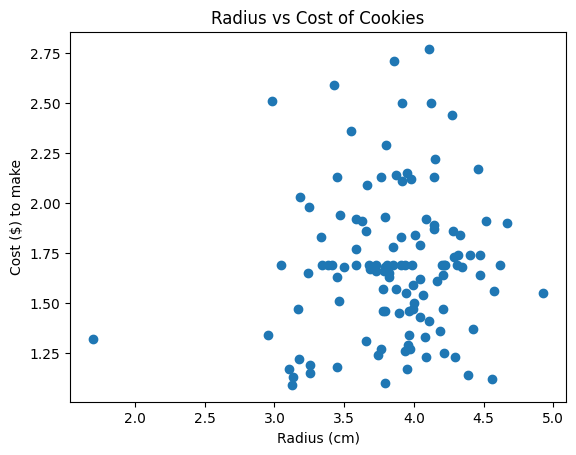

In [29]:
#TODO: plot the radius (x) versus cost to make (y)
import matplotlib.pyplot as plt

plt.scatter(cookies['radius'], cookies['cost_to_make'])
plt.title('Radius vs Cost of Cookies')
plt.xlabel('Radius (cm)')
plt.ylabel('Cost ($) to make')
plt.show()

We may even want to get more specific and visualize the shape of a distribution of the `laddoo lemon`'s radius by making a boxplot. We can also do this by using the `plot()` function.

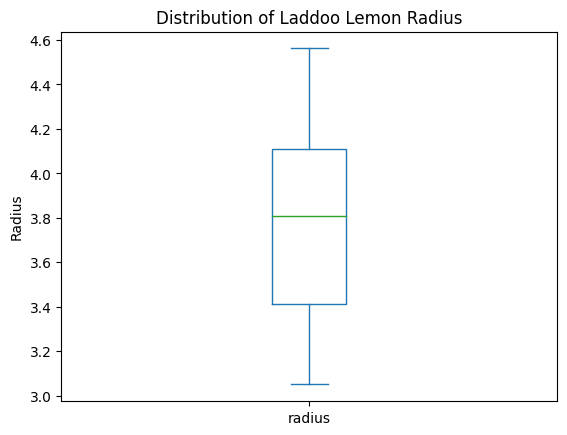

In [28]:
#TODO: add the described boxplot
laddoo_lemon_df = cookies[cookies['cookie'] == 'laddoo lemon']

# Plotting a boxplot for the radius of Laddoo Lemon
laddoo_lemon_df['radius'].plot(kind='box', title='Distribution of Laddoo Lemon Radius')
plt.ylabel('Radius')
plt.show()

Alternatively, we can create a histogram to visualize the distribution of the `laddoo lemon`'s radius. We can also do this by using the `plot()` function.

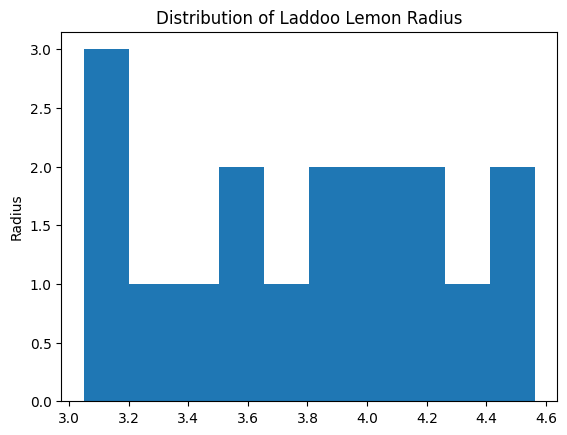

In [30]:
#TODO: add the described histogram
laddoo_lemon_df['radius'].plot(kind='hist', title='Distribution of Laddoo Lemon Radius')
plt.ylabel('Radius')
plt.show()

Things can get more complicated too. Maybe we want to analyze the behaviors of `bad berry bunny` and `laddoo lemon`'s radius using a boxplot. But this time, let's try it using the alternative `boxplot()` function. For practice, try doing it with `plot()` too!

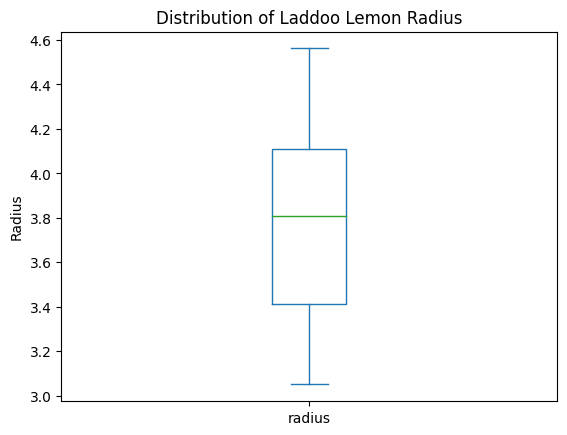

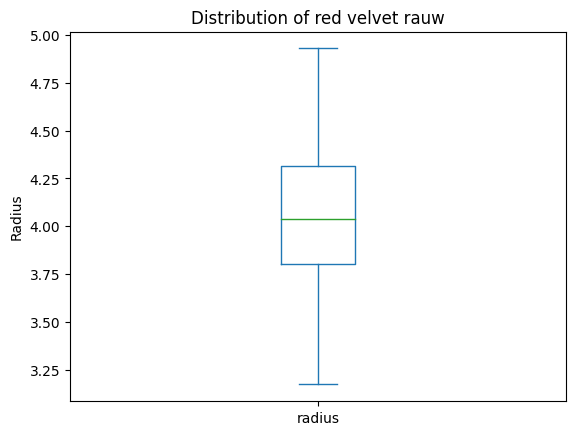

In [39]:
#TODO: analyze the two cookie's radius in a boxplot
laddoo_lemon_df = cookies[cookies['cookie'] == 'laddoo lemon']
red_velvet_rauw_df = cookies[cookies['cookie'] == 'red velvet rauw']

# Plotting a boxplot for the radius of Laddoo Lemon
laddoo_lemon_df['radius'].plot(kind='box', title='Distribution of Laddoo Lemon Radius')
plt.ylabel('Radius')
plt.show()

red_velvet_rauw_df['radius'].plot(kind='box', title='Distribution of red velvet rauw')
plt.ylabel('Radius')
plt.show()

### Practice Problems
Now that you have learned some of Pandas' capabilities, let's try some practice problems! **This is the part that will be checked when you submit it!**

#### Problem 1
How many cookies were made? (Hint: use the `shape` attribute)

In [40]:
#Add your code here
print(f"There are {cookies.shape[0]} cookies made.")

There are 118 cookies made.


#### Problem 2
Add a column to the DataFrame that has the value `True` if the cookie has a radius greater than 4 cm, and `False` otherwise. (Hint: use the `apply()` function)

In [41]:
#Add your code here
cookies['greater than 4cm'] = cookies['radius'].apply(lambda x: x > 4.0)
cookies.head()

,cookie,ingredients,calories,radius,cost_to_make,greater than 4cm
70,orange,"[""flour"",""orange juice"",""sugar"",""vegetable oil""]",166,1.695,1.320000,False
25,minty miami,"[""flour"",""mint extract"",""sugar"",""butter""]",178,2.952,1.340000,False
17,bbb,"[""flour"",""blueberries"",""sugar"",""butter""]",184,2.982,2.510000,False
62,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",164,3.050,1.691068,False
0,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",170,3.102,1.170000,False


#### Problem 3

Group the data by the `cookie` column, and find the average radius of each cookie. (Hint: use the `groupby()` and `transform()` function). Add this column to the DataFrame.

In [44]:
#Add your code here
cookies['average_radius'] = df.groupby('cookie')['radius'].transform('mean')
cookies.head(20)

,cookie,ingredients,calories,radius,cost_to_make,greater than 4cm,average_radius
70,orange,"[""flour"",""orange juice"",""sugar"",""vegetable oil""]",166,1.695,1.320000,False,3.519353
25,minty miami,"[""flour"",""mint extract"",""sugar"",""butter""]",178,2.952,1.340000,False,3.727471
17,bbb,"[""flour"",""blueberries"",""sugar"",""butter""]",184,2.982,2.510000,False,3.911000
62,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",164,3.050,1.691068,False,3.782118
0,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",170,3.102,1.170000,False,3.782118
85,minty miami,"[""flour"",""mint extract"",""sugar"",""butter""]",198,3.128,1.090000,False,3.727471
60,minty miami,"[""flour"",""mint extract"",""sugar"",""butter""]",168,3.132,1.130000,False,3.727471
29,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",193,3.172,1.470000,False,4.077444
55,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",189,3.179,1.220000,False,3.782118
13,chocolate,"[""flour"",""chocolate chips"",""sugar"",""butter""]",209,3.182,2.030000,False,3.983667


#### Problem 4
Create a new DataFrame that only contains the cookies that have the ingredient `"chocolate chips"`. (Hint: use the `str.contains()` function)

In [47]:
#Add your code here
chocolate_chip_cookies = cookies[cookies['ingredients'].str.contains('chocolate chips')]
chocolate_chip_cookies.head(10)

,cookie,ingredients,calories,radius,cost_to_make,greater than 4cm,average_radius
13,chocolate,"[""flour"",""chocolate chips"",""sugar"",""butter""]",209,3.182,2.030000,False,3.983667
20,chocolate,"[""flour"",""chocolate chips"",""sugar"",""butter""]",205,3.383,1.691068,False,3.983667
49,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",208,3.583,1.920000,False,4.013588
33,chocolate,"[""flour"",""chocolate chips"",""sugar"",""butter""]",206,3.681,1.691068,False,3.983667
6,chocolate,"[""flour"",""chocolate chips"",""sugar"",""butter""]",243,3.684,1.670000,False,3.983667
35,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",205,3.776,1.460000,False,4.013588
88,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",230,3.788,1.660000,False,4.013588
94,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",229,3.802,2.290000,False,4.013588
81,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",249,3.819,1.630000,False,4.013588
61,chocolate,"[""flour"",""chocolate chips"",""sugar"",""butter""]",216,3.824,1.650000,False,3.983667


#### Problem 5

Create a boxplot of `cost_to_make` for all cookies except `chocolate` using the `boxplot()` function.

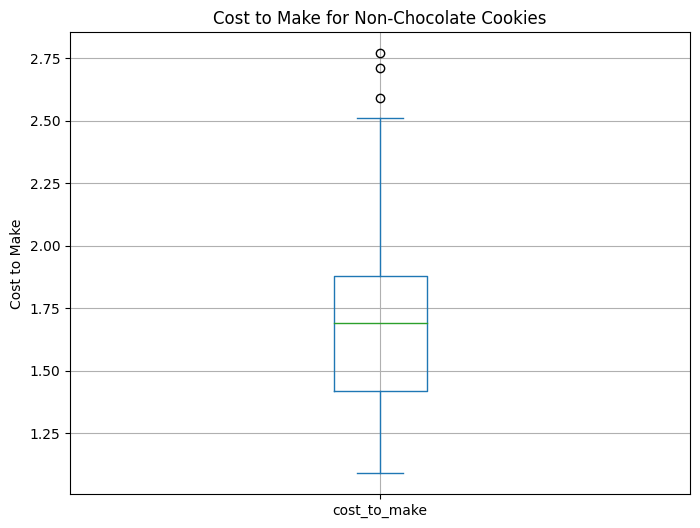

In [51]:
#Add your code here
non_chocolate_cookies = cookies[~cookies['cookie'].str.contains('Chocolate', case=False)]

# Create a boxplot for 'cost_to_make' of the filtered DataFrame
plt.figure(figsize=(8, 6))
non_chocolate_cookies['cost_to_make'].plot(kind='box')
plt.title('Cost to Make for Non-Chocolate Cookies')
plt.ylabel('Cost to Make')
plt.grid(True)
plt.show()

#### Problem 6

Create a histogram of the `bad berry bunny`'s calories using the `plot()` function.

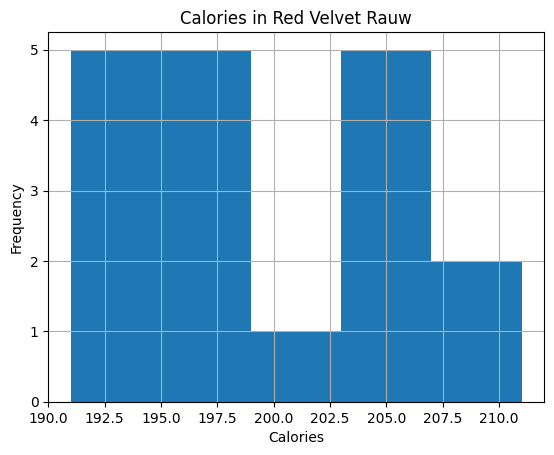

In [54]:
#Add your code here
red_velvet_rauw_df = cookies[cookies['cookie'] == 'red velvet rauw']

# Create a histogram for 'calories' of 'Red Velvet Rauw'
red_velvet_rauw_df['calories'].plot(kind='hist', bins=5, title='Calories in Red Velvet Rauw')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### Problem 7

Calculate the average calories per cookie type and display the result in a bar chart.

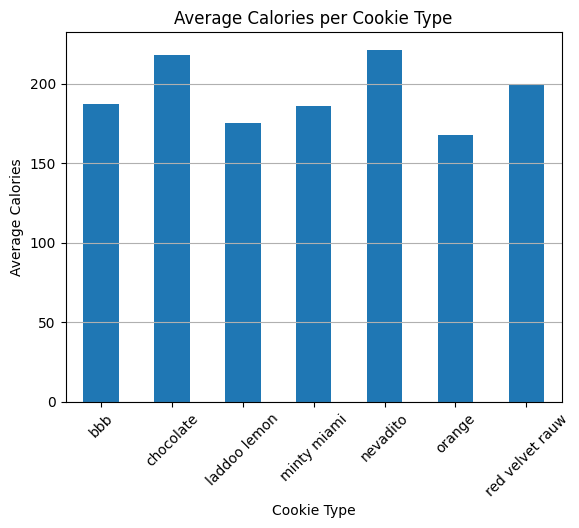

In [55]:
#Add your code here
average_calories = cookies.groupby('cookie')['calories'].mean()

# Plot the result in a bar chart
average_calories.plot(kind='bar', title='Average Calories per Cookie Type')
plt.xlabel('Cookie Type')
plt.ylabel('Average Calories')
plt.xticks(rotation=45)  # Rotate labels to make them readable
plt.grid(axis='y')  # Add grid lines only horizontally
plt.show()

#### Problem 8

Find the top 3 most expensive cookies in terms of cost_to_make

In [59]:
#Add your code here
top_3_expensive_cookies = cookies.sort_values(by='cost_to_make', ascending=False)

top_3_expensive_cookies.head(3)

,cookie,ingredients,calories,radius,cost_to_make,greater than 4cm,average_radius
34,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",176,4.110,2.77,True,3.782118
42,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",220,3.855,2.71,False,4.013588
11,orange,"[""flour"",""orange juice"",""sugar"",""vegetable oil""]",159,3.429,2.59,False,3.519353
